In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('full_features.csv')
y_b = pd.read_csv('binaryclass_labels.csv').to_numpy().ravel()
y_m = pd.read_csv('multiclass_labels.csv').to_numpy().ravel()
y_gb = pd.read_csv('binaryclass_labels_low.csv').to_numpy().ravel()
y_num = pd.read_csv('yield_labels.csv')

X = X.drop(['grafted'], axis=1)
print(np.unique(y_b, return_counts=True))
print(np.unique(y_gb, return_counts=True))

(array(['high', 'low'], dtype=object), array([ 671, 2965], dtype=int64))
(array(['bad', 'good'], dtype=object), array([1656, 1980], dtype=int64))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.813) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=0.835) total time=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] END ................................ score: (test=0.824) total time=   0.5s
[CV] END ................................ score: (test=0.863) total time=   0.4s
[CV] END ................................ score: (test=0.868) total time=   0.4s
[CV] END ................................ score: (test=0.808) total time=   0.4s
[CV] END ................................ score: (test=0.835) total time=   0.4s
[CV] END ................................ score: (test=0.824) total time=   0.4s
[CV] END ................................ score: (test=0.819) total time=   0.4s
[CV] END ................................ score: (test=0.780) total time=   0.4s
[CV] END ................................ score: (test=0.714) total time=   0.4s
[CV] END ................................ score: (test=0.703) total time=   0.4s
[CV] END ................................ score: (test=0.566) total time=   0.4s
[CV] END ................................ score: (test=0.901) total time=   0.4s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    9.6s finished


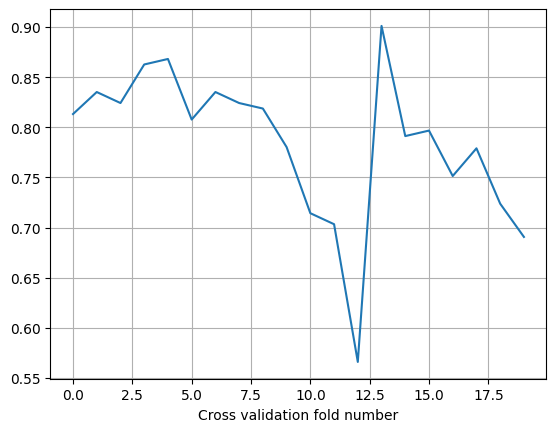

In [3]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_b, test_size=0.2, random_state=42)

model = RandomForestClassifier(oob_score=True, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cv_score = cross_val_score(model, X, y_b, cv=20, verbose=3)

print("Accuracy:", acc)
print('oob score:', model.oob_score_)
print(f'cv score: {cv_score.mean()} (std: {cv_score.std()})')
print('feature importance:', X.columns[np.flip(np.argsort(model.feature_importances_))])
print(np.sort(model.feature_importances_)[:-6:-1])

plt.plot(range(cv_score.size), cv_score)
plt.xlabel('Cross validation fold number')
plt.grid()

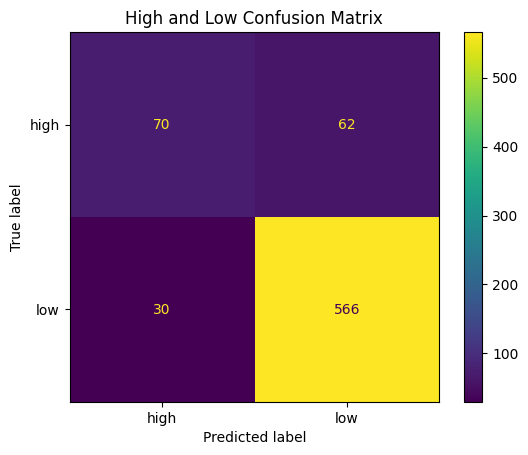

              precision    recall  f1-score   support

        high       0.70      0.53      0.60       132
         low       0.90      0.95      0.92       596

    accuracy                           0.87       728
   macro avg       0.80      0.74      0.76       728
weighted avg       0.86      0.87      0.87       728

(array(['high', 'low'], dtype=object), array([132, 596], dtype=int64))


In [4]:
labels = np.unique(y_b)
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)

disp.plot()
plt.title('High and Low Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))
print(np.unique(y_test, return_counts=True))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.621) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=0.615) total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] END ................................ score: (test=0.582) total time=   0.5s
[CV] END ................................ score: (test=0.670) total time=   0.5s
[CV] END ................................ score: (test=0.731) total time=   0.5s
[CV] END ................................ score: (test=0.670) total time=   0.4s
[CV] END ................................ score: (test=0.571) total time=   0.4s
[CV] END ................................ score: (test=0.451) total time=   0.4s
[CV] END ................................ score: (test=0.511) total time=   0.4s
[CV] END ................................ score: (test=0.533) total time=   0.4s
[CV] END ................................ score: (test=0.423) total time=   0.4s
[CV] END ................................ score: (test=0.588) total time=   0.4s
[CV] END ................................ score: (test=0.626) total time=   0.4s
[CV] END ................................ score: (test=0.720) total time=   0.4s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   10.8s finished


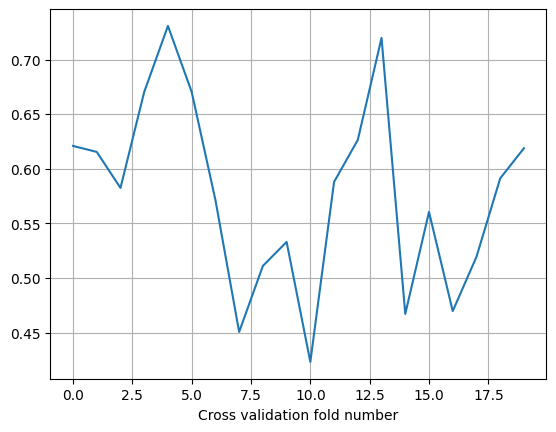

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_gb, test_size=0.2, random_state=42)

model = RandomForestClassifier(oob_score=True, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cv_score = cross_val_score(model, X, y_gb, cv=20, verbose=3)

print("Accuracy:", acc)
print('oob score:', model.oob_score_)
print(f'cv score: {cv_score.mean()} (std: {cv_score.std()})')
print('feature importance:', X.columns[np.flip(np.argsort(model.feature_importances_))])
print(np.sort(model.feature_importances_)[:-6:-1])

plt.plot(range(cv_score.size), cv_score)
plt.xlabel('Cross validation fold number')
plt.grid()

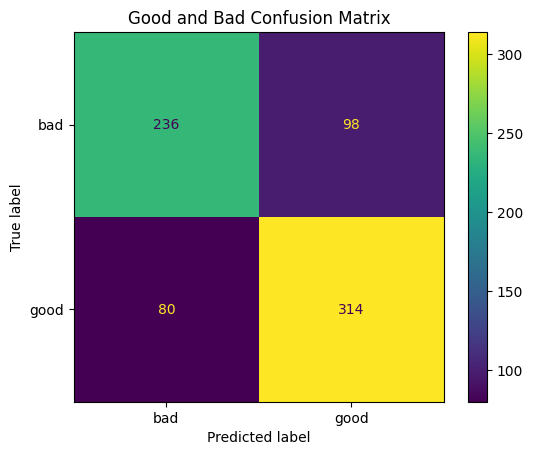

              precision    recall  f1-score   support

         bad       0.75      0.71      0.73       334
        good       0.76      0.80      0.78       394

    accuracy                           0.76       728
   macro avg       0.75      0.75      0.75       728
weighted avg       0.76      0.76      0.75       728

(array(['bad', 'good'], dtype=object), array([334, 394], dtype=int64))


In [6]:
labels = np.unique(y_gb)
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)

disp.plot()
plt.title('Good and Bad Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))
print(np.unique(y_test, return_counts=True))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.462) total time=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.484) total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] END ................................ score: (test=0.495) total time=   0.5s
[CV] END ................................ score: (test=0.566) total time=   0.5s
[CV] END ................................ score: (test=0.632) total time=   0.5s
[CV] END ................................ score: (test=0.544) total time=   0.5s
[CV] END ................................ score: (test=0.599) total time=   0.5s
[CV] END ................................ score: (test=0.577) total time=   0.5s
[CV] END ................................ score: (test=0.544) total time=   0.5s
[CV] END ................................ score: (test=0.544) total time=   0.5s
[CV] END ................................ score: (test=0.379) total time=   0.5s
[CV] END ................................ score: (test=0.495) total time=   0.5s
[CV] END ................................ score: (test=0.527) total time=   0.5s
[CV] END ................................ score: (test=0.637) total time=   0.5s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   11.4s finished


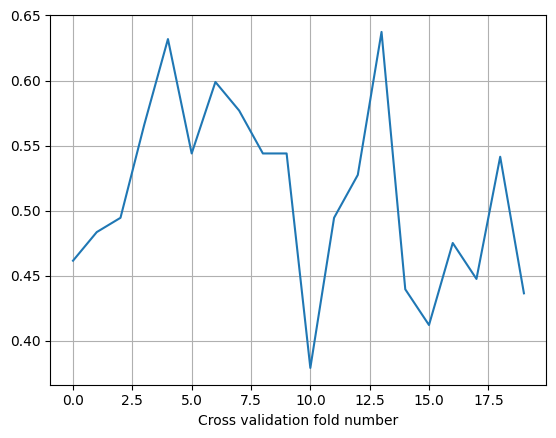

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_m, test_size=0.2, random_state=42)

model = RandomForestClassifier(oob_score=True, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cv_score = cross_val_score(model, X, y_m, cv=20, verbose=3)

print("Accuracy:", acc)
print('oob score:', model.oob_score_)
print(f'cv score: {cv_score.mean()} (std: {cv_score.std()})')
print('feature importance:', X.columns[np.flip(np.argsort(model.feature_importances_))])

plt.plot(range(cv_score.size), cv_score)
plt.xlabel('Cross validation fold number')
plt.grid()

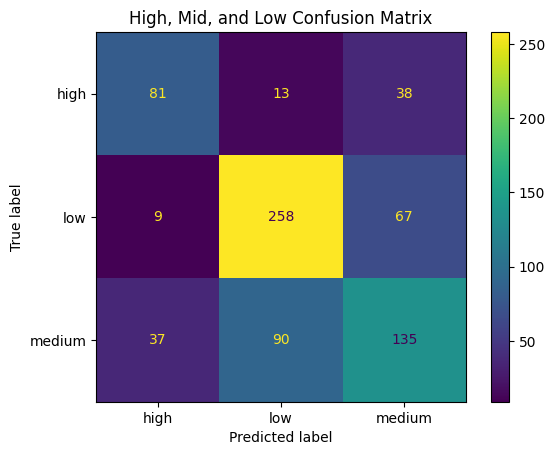

              precision    recall  f1-score   support

        high       0.64      0.61      0.63       132
         low       0.71      0.77      0.74       334
      medium       0.56      0.52      0.54       262

    accuracy                           0.65       728
   macro avg       0.64      0.63      0.64       728
weighted avg       0.65      0.65      0.65       728

(array(['high', 'low', 'medium'], dtype=object), array([132, 334, 262], dtype=int64))


In [8]:
labels = np.unique(y_m)
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)

disp.plot()
plt.title('High, Mid, and Low Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))
print(np.unique(y_test, return_counts=True))

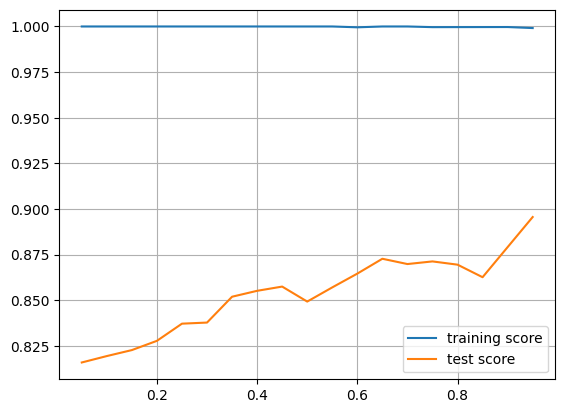

In [9]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced')
train_size = np.arange(0.05, 1, 0.05)
train = []
test = []

for size in train_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y_b, train_size=size, random_state=42)
    model.fit(X_train, y_train)
    
    train.append(accuracy_score(y_train, model.predict(X_train)))
    test.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(train_size, train, label='training score')
plt.plot(train_size, test, label='test score')
plt.legend()
plt.grid()

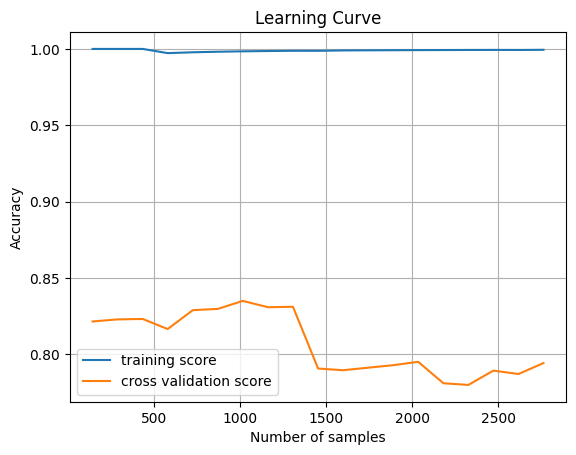

In [10]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced')

train_size_abs, train_scores, test_scores = learning_curve(model, X, y_b, train_sizes=np.arange(0.05, 1, 0.05))

plt.plot(train_size_abs, np.mean(train_scores, axis=1), label='training score')
plt.plot(train_size_abs, np.mean(test_scores, axis=1), label='cross validation score')
plt.title('Learning Curve')
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

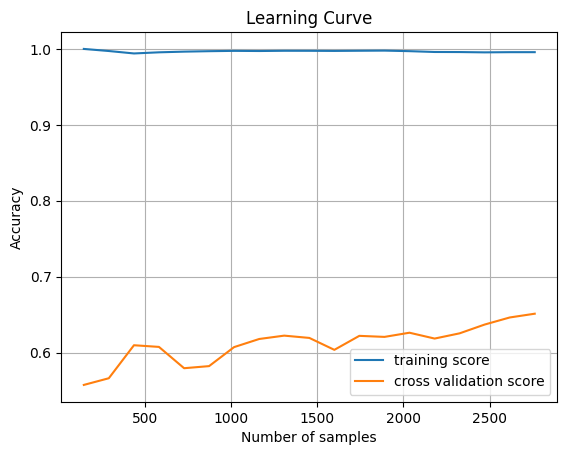

In [11]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced')

train_size_abs, train_scores, test_scores = learning_curve(model, X, y_gb, train_sizes=np.arange(0.05, 1, 0.05), n_jobs=4)

plt.plot(train_size_abs, np.mean(train_scores, axis=1), label='training score')
plt.plot(train_size_abs, np.mean(test_scores, axis=1), label='cross validation score')
plt.title('Learning Curve')
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()